In [2]:
#Import the libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [103]:
stock = pd.read_csv("C:/Users/suresh/Desktop/PYTHON ML DATA SCIENCE/Stock Prediction/Stock Data/CIPLA.csv")

In [104]:
stock.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,CIPLA,EQ,1349.40,1410.0,1457.35,1380.05,1457.35,1457.35,1441.36,21060,3.035496e+12,NaN,NaN,NaN
1,2000-01-04,CIPLA,EQ,1457.35,1537.0,1537.00,1430.00,1466.05,1465.25,1460.43,30215,4.412698e+12,NaN,NaN,NaN
2,2000-01-05,CIPLA,EQ,1465.25,1474.0,1474.00,1365.00,1441.00,1435.05,1428.11,33799,4.826872e+12,NaN,NaN,NaN
3,2000-01-06,CIPLA,EQ,1435.05,1434.0,1435.00,1349.00,1365.00,1355.85,1390.55,33083,4.600356e+12,NaN,NaN,NaN
4,2000-01-07,CIPLA,EQ,1355.85,1370.0,1389.90,1247.40,1247.40,1247.55,1267.49,66536,8.433351e+12,NaN,NaN,NaN


In [105]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5306 non-null   object 
 1   Symbol              5306 non-null   object 
 2   Series              5306 non-null   object 
 3   Prev Close          5306 non-null   float64
 4   Open                5306 non-null   float64
 5   High                5306 non-null   float64
 6   Low                 5306 non-null   float64
 7   Last                5306 non-null   float64
 8   Close               5306 non-null   float64
 9   VWAP                5306 non-null   float64
 10  Volume              5306 non-null   int64  
 11  Turnover            5306 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4792 non-null   float64
 14  %Deliverble         4792 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 621.9

In [106]:
stock.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5.306000e+03,5.306000e+03,2456.000000,4.792000e+03,4792.000000
mean,540.503798,541.457755,549.587693,532.143583,540.472588,540.421052,540.931589,1.550071e+06,7.841696e+13,44967.250407,7.408486e+05,0.509209
std,289.319810,289.955959,295.087710,283.868905,289.158087,289.151156,289.411215,2.317962e+06,1.620908e+14,43776.047324,7.339493e+05,0.154639
min,160.100000,150.550000,169.450000,145.000000,152.000000,160.100000,158.140000,5.050000e+02,5.400606e+10,613.000000,2.013000e+03,0.069300
25%,309.025000,309.962500,312.750000,305.350000,309.000000,309.025000,309.290000,3.790408e+05,1.447839e+13,21724.000000,2.831312e+05,0.404575
50%,473.850000,474.625000,479.950000,468.875000,473.525000,473.850000,475.215000,1.047786e+06,3.725861e+13,32967.000000,5.787145e+05,0.516650
75%,681.937500,683.225000,691.787500,671.675000,681.937500,681.937500,682.035000,1.815542e+06,7.848478e+13,50869.500000,9.761000e+05,0.615125
max,1465.250000,1537.000000,1537.000000,1430.000000,1466.050000,1465.250000,1460.430000,5.689556e+07,4.498902e+15,603361.000000,1.081558e+07,0.994500


In [107]:
# Ensure we are working with a copy of the DataFrame to avoid the SettingWithCopyWarning
stock = stock.copy()

In [108]:
# Calculate HL_Perc and CO_Perc
stock.loc[:, 'HL_Perc'] = (stock['High'] - stock['Low']) / stock['Low'] * 100
stock.loc[:, 'CO_Perc'] = (stock['Close'] - stock['Open']) / stock['Open'] * 100

In [109]:
dates = np.array(stock["Date"])
dates_check = dates[-30:]
dates = dates[:-30]

In [110]:
stock.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'HL_Perc', 'CO_Perc'],
      dtype='object')

In [111]:
stock = stock[["HL_Perc", "CO_Perc", "Close", "Volume"]]

In [112]:
#Define the label column
stock["PriceNextMonth"] = stock["Close"].shift(-30)

In [113]:
stock.tail()

,HL_Perc,CO_Perc,Close,Volume,PriceNextMonth
5301,4.195533,-3.227875,905.40,10255697,NaN
5302,2.053274,-0.065717,912.40,5669049,NaN
5303,1.666759,-0.453874,910.20,7251009,NaN
5304,1.482301,-0.597620,906.50,4953091,NaN
5305,2.248127,1.065779,910.35,6459737,NaN


In [114]:
#Make fetaure and label arrays
X = np.array(stock.drop(["PriceNextMonth"], 1))
X = preprocessing.scale(X)
X_Check = X[-30:]
X = X[:-30]
stock.dropna(inplace = True)
y = np.array(stock["PriceNextMonth"])

C:\Users\suresh\AppData\Local\Temp\ipykernel_17924\459189850.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(stock.drop(["PriceNextMonth"], 1))


In [115]:
#Divide the data set into training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [116]:
#Define the prediction model
model = RandomForestRegressor()

In [117]:
#Fit the model using training data
model.fit(X_train, y_train)

RandomForestRegressor()

In [118]:
#Calculate the confidence value by applying the model to testing data
conf = model.score(X_test, y_test)
print(conf)

0.8677815971962398


In [119]:
#Fit the model again using the whole data set
model.fit(X,y)

RandomForestRegressor()

In [120]:
predictions = model.predict(X_Check)

In [121]:
#Make the final DataFrame containing Dates, ClosePrices, and Forecast values
actual = pd.DataFrame(dates, columns = ["Date"])
actual["ClosePrice"] = stock["Close"]
actual["Forecast"] = np.nan
actual.set_index("Date", inplace = True)
forecast = pd.DataFrame(dates_check, columns=["Date"])
forecast["Forecast"] = predictions
forecast["ClosePrice"] = np.nan
forecast.set_index("Date", inplace = True)
var = [actual, forecast]
result = pd.concat(var)  #This is the final DataFrame

Text(0, 0.5, 'Price')

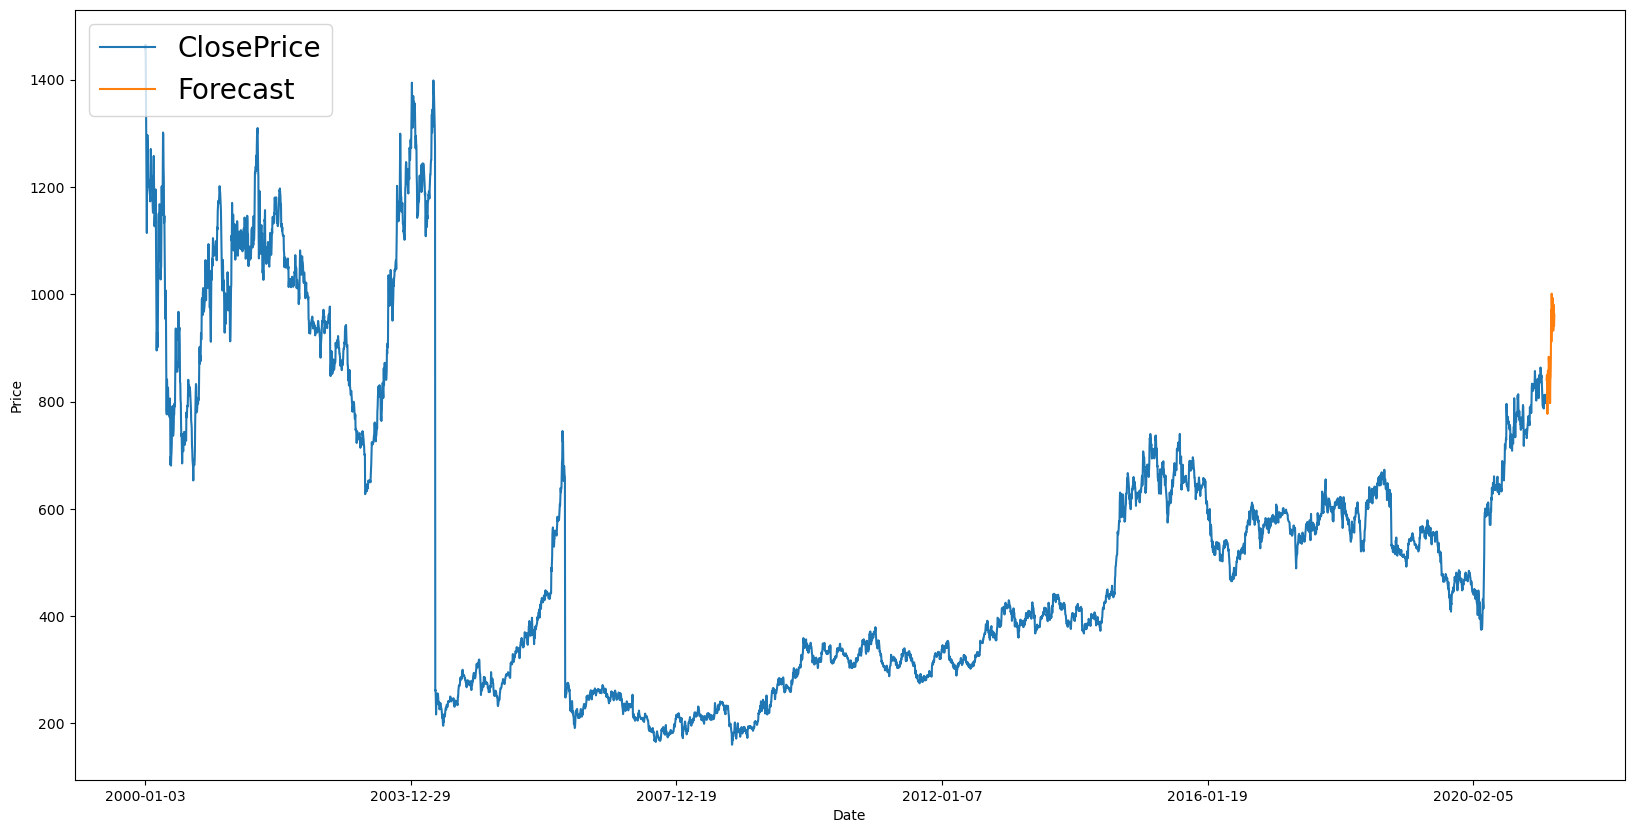

In [122]:
#Plot the final results
result.plot(figsize=(20,10), linewidth=1.5)
plt.legend(loc=2, prop={'size':20})
plt.xlabel('Date')
plt.ylabel('Price')